Part1. DTM 작성 및 TF 확인
- 텍스트 분석 - DTM 알고리즘의 이해_문서내의 단어빈도수 계산에서 DTM 제작이 된후 작업 연결임

In [3]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해(구글에서 math 라이브러리 검색)

docs = [
    '먹고 싶은 사과',
    '먹고 싶은 바나나',
    '길고 노란 바나나 바나나',
    '저는 과일이 좋아요'
]
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()


print(vocab)

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']


In [7]:
# 문자별 단어 빈도수(DTM)
N = len(docs)
result = []

for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(d.count(t))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


### Part2-1. TF-IDF 계산 (IDF 계산)
- 출처: https://wikidocs.net/31698

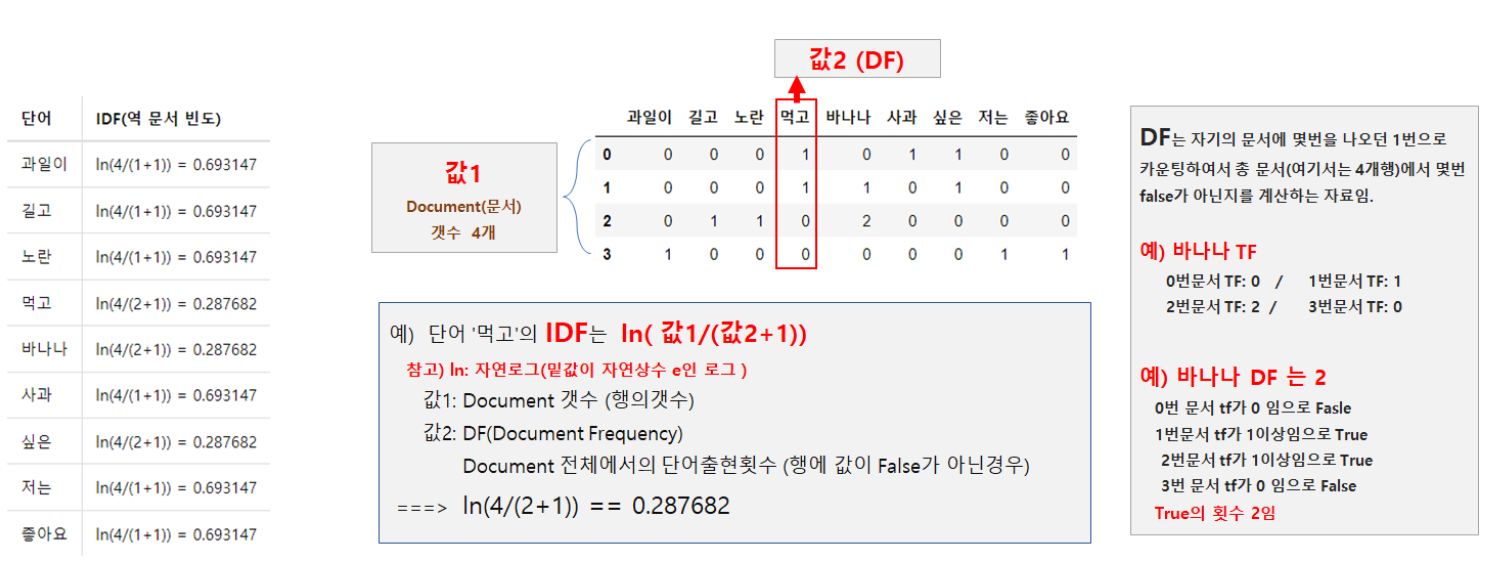

In [ ]:
# docs = [
#     '먹고 싶은 사과',
#     '먹고 싶은 바나나',
#     '길고 노란 바나나 바나나',
#     '저는 과일이 좋아요'
# ]
# vocab = ['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [8]:
# 역 빈도수 계산 함수
def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

In [10]:
# 역빈도수(IDF)
result = []  # 단어의 문서 출현 빈도
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))
idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


### Part2-2. TF-IDF 계산
- 출처: https://wikidocs.net/31698

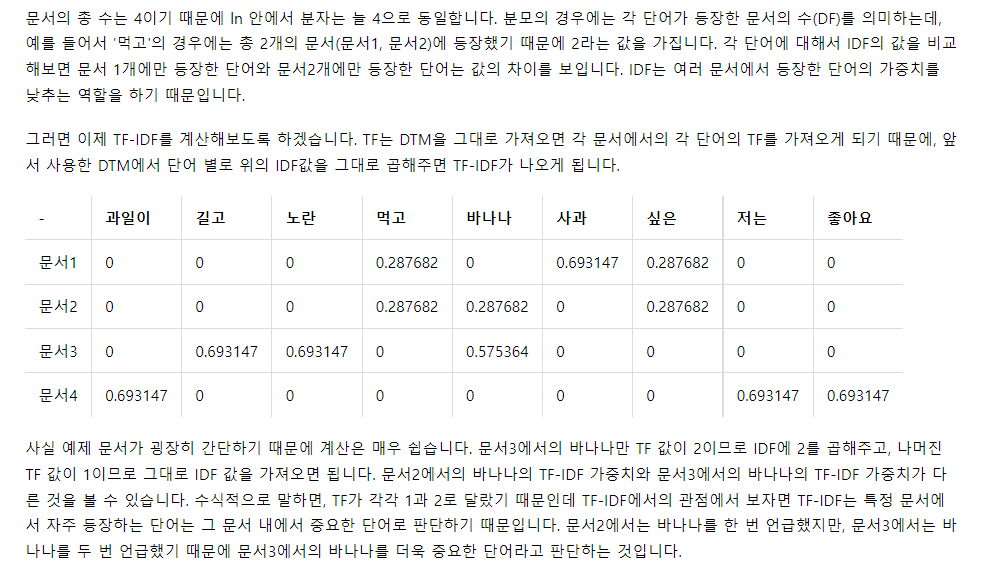